In [1]:
import qiskit
from qiskit_experiments.library.characterization.t2hahn import T2Hahn

In [2]:
qubit = 0
conversion_factor = 1e-6 # our delay will be in micro-sec
delays = list(range(0, 50, 1) )
delays = [float(_) * conversion_factor for _ in delays]
number_of_echoes = 1

# Create a T2Hahn experiment. Print the first circuit as an example
exp1 = T2Hahn(physical_qubits=(qubit,), delays=delays, num_echoes=number_of_echoes)
print(exp1.circuits()[0])

     ┌─────────┐┌───────────────┐┌───────┐┌───────────────┐┌─────────┐┌─┐
  q: ┤ Rx(π/2) ├┤ Delay(0.0[s]) ├┤ Rx(π) ├┤ Delay(0.0[s]) ├┤ Rx(π/2) ├┤M├
     └─────────┘└───────────────┘└───────┘└───────────────┘└─────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0 


In [3]:
from qiskit_experiments.test.t2hahn_backend import T2HahnBackend

estimated_t2hahn = 20 * conversion_factor
# The behavior of the backend is determined by the following parameters
backend = T2HahnBackend(
    t2hahn=[estimated_t2hahn],
    frequency=[100100],
    initialization_error=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],
)

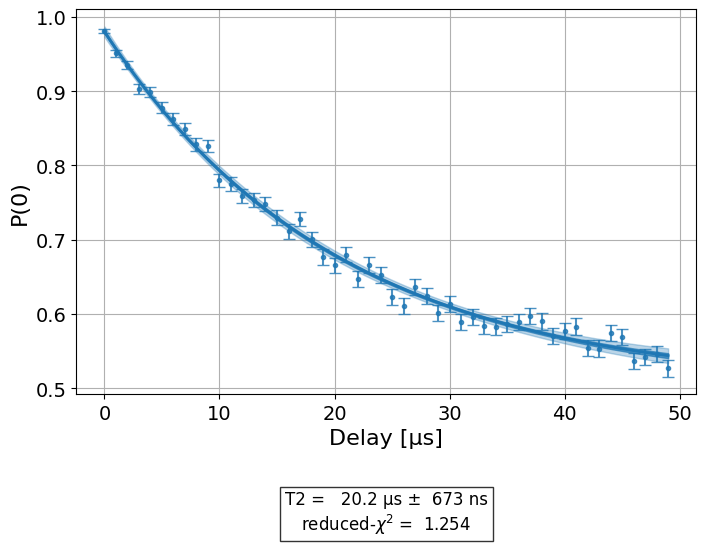

In [4]:
exp1.analysis.set_options(p0=None, plot=True)
expdata1 = exp1.run(backend=backend, shots=2000, seed_simulator=101)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))

In [5]:
# Print results
for result in expdata1.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2HahnAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 36
 - degree of freedom: 47
 - chi-square: 58.9380089713179
 - reduced chi-square: 1.2540001908791043
 - Akaike info crit.: 14.223159535441075
 - Bayesian info crit.: 19.959228551725513
 - init params:
  * amp = 0.45427286356821583
  * tau = 8.612552938252412e-05
  * base = 0.5269865067466267
 - fit params:
  * amp = 0.47845312085820824 ± 0.006360233367929398
  * tau = 2.0209111792285823e-05 ± 6.730935777874703e-07
  * base = 0.5015615051477432 ± 0.0067981632667552345
 - correlations:
  * (amp, base) = -0.9385042946717721
  * (tau, base) = -0.9334420100220986
  * (amp, tau) = 0.8111943967543174
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2
- value: (2.02+/-0.07)e-05
- χ²: 1.2540001908791043
- quality: good
- extra: <1 ite

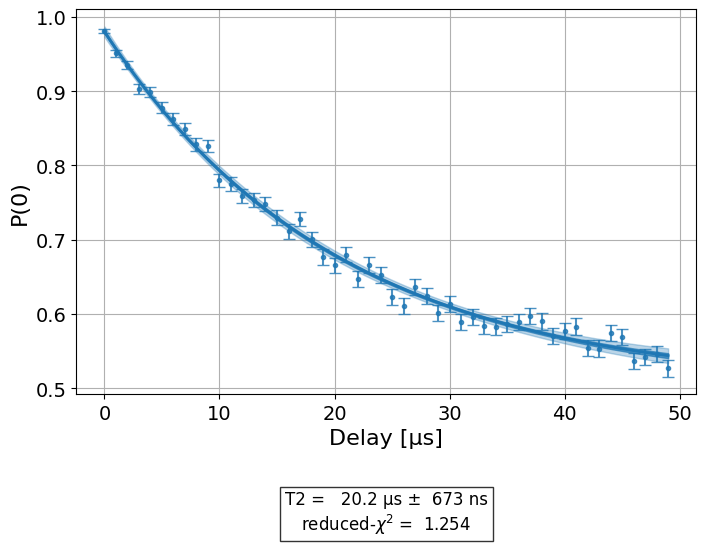

In [6]:
exp_with_p0 = T2Hahn(physical_qubits=[qubit], delays=delays, num_echoes=number_of_echoes)
exp_with_p0.analysis.set_options(p0={"amp": 0.5, "tau": estimated_t2hahn, "base": 0.5})
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000, seed_simulator=101)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))

In [7]:
# Print results
for result in expdata_with_p0.analysis_results():
    print(result)

AnalysisResult
- name: @Parameters_T2HahnAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 47
 - chi-square: 58.93800897124156
 - reduced chi-square: 1.25400019087748
 - Akaike info crit.: 14.223159535376313
 - Bayesian info crit.: 19.95922855166075
 - init params:
  * amp = 0.5
  * tau = 1.9999999999999998e-05
  * base = 0.5
 - fit params:
  * amp = 0.4784531224203022 ± 0.0063602334850776645
  * tau = 2.020911199726024e-05 ± 6.730935901436374e-07
  * base = 0.5015615032490383 ± 0.006798163390724862
 - correlations:
  * (amp, base) = -0.9385042971060297
  * (tau, base) = -0.9334420117373451
  * (amp, tau) = 0.81119440260178
- quality: good
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: T2
- value: (2.02+/-0.07)e-05
- χ²: 1.25400019087748
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- veri

In [8]:
import numpy as np

qubit2 = 0
# set the desired delays
conversion_factor = 1e-6

# The delays aren't equally spaced due the behavior of the exponential
# decay curve where the change in the result during earlier times is
# larger than later times. In addition, since the total delay is
# 'delay * 2 * num_of_echoes', the construction of the delays for
# each experiment will be different such that their total length
# will be the same.

# Delays for Hahn Echo Experiment with 0 echoes
delays2 = np.append(
                    (np.linspace(0.0, 51.0, num=26)).astype(float),
                    (np.linspace(53, 100.0, num=25)).astype(float),
                )

delays2 = [float(_) * conversion_factor for _ in delays2]

# Delays for Hahn Echo Experiment with 1 echo
delays3 = np.append(
                    (np.linspace(0.0, 25.5, num=26)).astype(float),
                    (np.linspace(26.5, 50, num=25)).astype(float),
                )
delays3 = [float(_) * conversion_factor for _ in delays3]

num_echoes = 1
estimated_t2hahn2 = 30 * conversion_factor

# Create a T2Hahn experiment with 0 echoes
exp2_0echoes = T2Hahn([qubit2], delays2, num_echoes=0)
exp2_0echoes.analysis.set_options(p0={"amp": 0.5, "tau": estimated_t2hahn2, "base": 0.5})
print("The first circuit of hahn echo experiment with 0 echoes:")
print(exp2_0echoes.circuits()[0])

# Create a T2Hahn experiment with 1 echo. Print the first circuit as an example
exp2_1echoes = T2Hahn([qubit2], delays3, num_echoes=num_echoes)
exp2_1echoes.analysis.set_options(p0={"amp": 0.5, "tau": estimated_t2hahn2, "base": 0.5})
print("The first circuit of hahn echo experiment with 1 echo:")
print(exp2_1echoes.circuits()[0])

The first circuit of hahn echo experiment with 0 echoes:
     ┌─────────┐┌───────────────┐┌──────────┐┌─┐
  q: ┤ Rx(π/2) ├┤ Delay(0.0[s]) ├┤ Rx(-π/2) ├┤M├
     └─────────┘└───────────────┘└──────────┘└╥┘
c: 1/═════════════════════════════════════════╩═
                                              0 
The first circuit of hahn echo experiment with 1 echo:
     ┌─────────┐┌───────────────┐┌───────┐┌───────────────┐┌─────────┐┌─┐
  q: ┤ Rx(π/2) ├┤ Delay(0.0[s]) ├┤ Rx(π) ├┤ Delay(0.0[s]) ├┤ Rx(π/2) ├┤M├
     └─────────┘└───────────────┘└───────┘└───────────────┘└─────────┘└╥┘
c: 1/══════════════════════════════════════════════════════════════════╩═
                                                                       0 


Hahn Echo with 0 echoes:


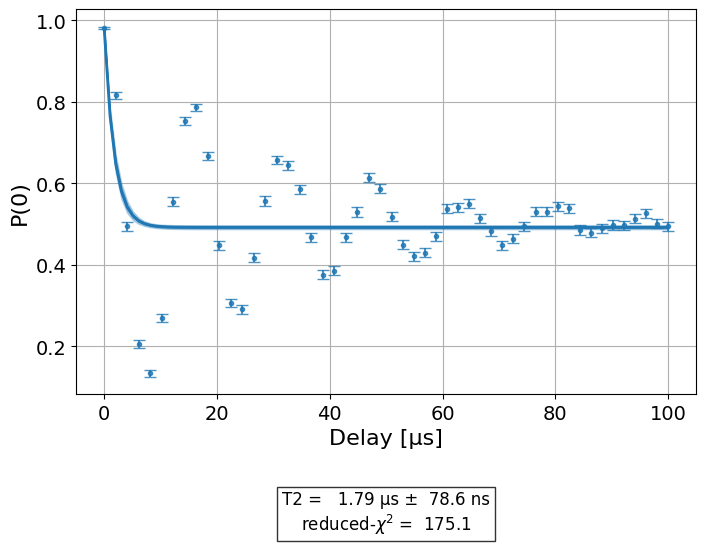

Hahn Echo with 1 echo:


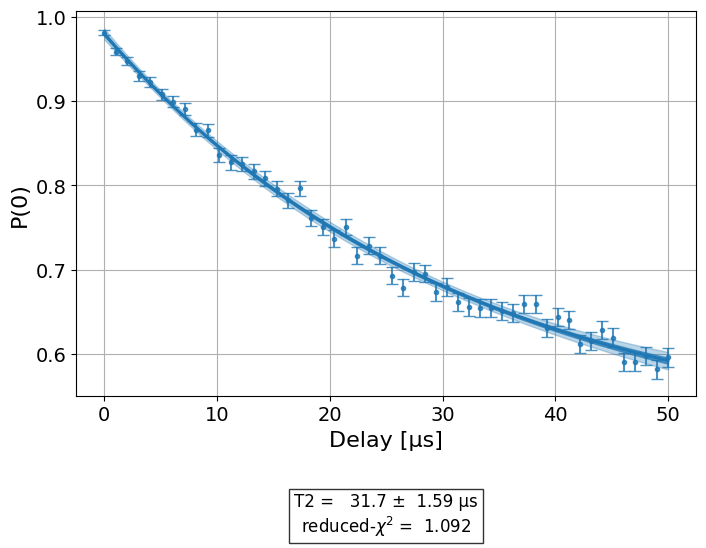

In [9]:
from qiskit_experiments.test.t2hahn_backend import T2HahnBackend

detuning_frequency = 2 * np.pi * 10000

# The behavior of the backend is determined by the following parameters
backend2 = T2HahnBackend(
    t2hahn=[estimated_t2hahn2],
    frequency=[detuning_frequency],
    initialization_error=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02],)

# Analysis for Hahn Echo experiment with 0 echoes.
expdata2_0echoes = exp2_0echoes.run(backend=backend2, shots=2000, seed_simulator=101)
expdata2_0echoes.block_for_results()  # Wait for job/analysis to finish.

# Analysis for Hahn Echo experiment with 1 echo
expdata2_1echoes = exp2_1echoes.run(backend=backend2, shots=2000, seed_simulator=101)
expdata2_1echoes.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
print("Hahn Echo with 0 echoes:")
display(expdata2_0echoes.figure(0))
print("Hahn Echo with 1 echo:")
display(expdata2_1echoes.figure(0))